# World's Wealthiest - Descriptive Statistics
The World's Billionaires is an annual ranking by documented net worth of the world's wealthiest billionaires compiled and published in March annually by the American business magazine Forbes. The list was first published in March 1987. The total net worth of each individual on the list is estimated and is cited in United States dollars, based on their documented assets and accounting for debt. Royalty and dictators whose wealth comes from their positions are excluded from these lists. This ranking is an index of the wealthiest documented individuals, excluding and ranking against those with wealth that is not able to be completely ascertained. (wikipedia)

### The dataset has following features: 
     - Year
     - Rank
     - Name
     - Net_Worth
     - Age
     - Nationality
     - Source_wealth

**Objective**: Perform descriptive analytics to understand what data tells us about the world's wealthiest

In [95]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',25)

In [96]:
data= pd.read_csv("billionaires.csv")

In [97]:
data.head(10)

,year,rank,name,net_worth,age,natinality,source_wealth
0,2019,1,Jeff Bezos,131,55,United States,Amazon
1,2019,2,Bill Gates,96.5,63,United States,Microsoft
2,2019,3,Warren Buffett,82.5,88,United States,Berkshire Hathaway
3,2019,4,Bernard Arnault,76,70,France,LVMH
4,2019,5,Carlos Slim,64,79,Mexico,"América Móvil, Grupo Carso"
5,2019,6,Amancio Ortega,62.7,82,Spain,"Inditex, Zara"
6,2019,7,Larry Ellison,62.5,74,United States,Oracle Corporation
7,2019,8,Mark Zuckerberg,62.3,34,United States,Facebook
8,2019,9,Michael Bloomberg,55.5,77,United States,Bloomberg L.P.
9,2019,10,Larry Page,50.8,45,United States,Alphabet Inc.


In [98]:
data.rename(columns = {'natinality':'nationality'}, inplace = True) 

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
year             180 non-null int64
rank             180 non-null int64
name             180 non-null object
net_worth        180 non-null object
age              180 non-null int64
nationality      180 non-null object
source_wealth    180 non-null object
dtypes: int64(3), object(4)
memory usage: 9.9+ KB


In [100]:
data['net_worth']=data['net_worth'].astype('float')        #change the datatype of column "net_worth"
data['year']=data['year'].astype('object')

In [101]:
data['source_wealth'].value_counts()

Microsoft                                  23
Berkshire Hathaway                         18
Oracle Corporation                         14
Koch Industries                            12
Wal-Mart                                   11
Aldi Süd                                    7
Walmart                                     6
Telmex, América Móvil, Grupo Carso          6
Inditex Group                               6
Arcelor Mittal                              5
IKEA                                        5
LVMH Moët Hennessy • Louis Vuitton          4
Kingdom Holding Company                     4
Amazon                                      4
LVMH                                        4
Facebook                                    4
América Móvil, Grupo Carso                  4
Reliance Industries                         4
EBX Group                                   3
Bloomberg L.P.                              3
Inditex, Zara                               3
Inditex                           

In [102]:
data_by_year=data.groupby('year')
data_by_year.describe()

age                                                  net_worth         \
     count  mean        std   min    25%   50%    75%   max     count   mean   
year                                                                           
2002  10.0  55.0  15.570628  35.0  43.25  51.0  66.00  80.0      10.0  27.52   
2003  10.0  60.8  12.968338  46.0  53.25  56.5  67.75  82.0      10.0  26.63   
2004  10.0  61.6  13.882043  47.0  52.00  57.0  69.75  84.0      10.0  25.50   
2005  10.0  62.8  12.787146  49.0  52.50  60.5  71.75  85.0      10.0  26.22   
2006  10.0  64.3  12.970479  49.0  53.50  61.5  76.50  82.0      10.0  27.74   
2007  10.0  65.9  11.512795  49.0  56.50  69.0  75.25  80.0      10.0  34.35   
2008  10.0  63.8  16.287691  40.0  51.25  62.5  76.75  88.0      10.0  42.60   
2009  10.0  70.6  13.672357  52.0  59.50  71.0  81.75  89.0      10.0  25.39   
2010  10.0  66.0  12.328828  53.0  55.50  63.5  73.00  90.0      10.0  34.22   
2011  10.0  63.7   9.031427  53.0  56.25  62.0  69.75  80.0      10.0  40.61   
2012  10.0  70.8  12.072006  55.0  63.25  69.5  79.50  92.0      10.0  39.54   
2013  10.0  74.2   9.908470  57.0  69.00  74.5  80.75  90.0      10.0  45.15   
2014  10.0  72.3   7.803845  58.0  66.25  73.5  77.75  83.0      10.0  50.76   
2015  10.0  74.3   9.626930  59.0  67.00  74.5  78.75  92.0      10.0  55.60   
2016  10.0  68.3  16.330272  31.0  62.75  74.5  78.25  85.0      10.0  50.54   
2017  10.0  69.3  16.330272  32.0  63.75  75.5  79.25  86.0      10.0  61.25   
2018  10.0  69.6  16.208365  33.0  63.75  75.0  80.25  87.0      10.0  74.46   
2019  10.0  66.7  17.320829  34.0  57.00  72.0  78.50  88.0      10.0  74.38   

                                                     rank                      \
            std   min     25%    50%     75%    max count mean       std  min   
year                                                                            
2002  14.434665  16.1  19.550  20.00  27.400   60.0  10.0  5.5  3.027650  1.0   
2003  10.266889  20.5  20.550  22.15  26.400   52.8  10.0  5.2  2.616189  1.0   
2004  10.229152  20.0  20.000  20.50  22.625   46.6  10.0  4.5  1.900292  1.0   
2005  10.339761  18.3  19.125  23.35  24.700   46.5  10.0  5.5  3.027650  1.0   
2006  11.020304  18.8  20.375  22.75  29.500   52.0  10.0  5.5  3.027650  1.0   
2007  13.004380  22.0  24.500  29.25  45.000   56.0  10.0  5.5  3.027650  1.0   
2008  13.631662  27.0  30.250  42.50  54.750   62.0  10.0  5.5  3.027650  1.0   
2009   8.439648  18.3  19.350  21.75  31.875   40.0  10.0  5.5  3.027650  1.0   
2010  11.932011  23.5  27.125  28.35  42.500   53.5  10.0  5.5  3.027650  1.0   
2011  15.351399  26.5  30.250  35.30  47.750   74.0  10.0  5.5  3.027650  1.0   
2012  15.050079  25.4  27.000  36.75  43.250   69.0  10.0  5.5  3.027650  1.0   
2013  16.353814  29.0  31.750  38.50  56.125   73.0  10.0  5.4  2.988868  1.0   
2014  15.550791  34.7  38.500  44.00  62.550   76.0  10.0  5.4  2.988868  1.0   
2015  16.239732  40.1  42.000  48.60  70.650   79.2  10.0  5.4  2.988868  1.0   
2016  12.636824  39.6  40.900  44.90  58.100   75.0  10.0  5.4  2.875181  1.0   
2017  13.873976  47.5  49.275  55.25  72.425   86.0  10.0  5.4  2.913570  1.0   
2018  16.689132  58.5  61.775  70.50  81.000  112.0  10.0  5.4  2.913570  1.0   
2019  24.054050  50.8  62.350  63.35  80.875  131.0  10.0  5.5  3.027650  1.0   

                             
       25%  50%   75%   max  
year                         
2002  3.25  5.5  7.75  10.0  
2003  3.25  5.5  7.75   8.0  
2004  3.25  5.5  6.00   6.0  
2005  3.25  5.5  7.75  10.0  
2006  3.25  5.5  7.75  10.0  
2007  3.25  5.5  7.75  10.0  
2008  3.25  5.5  7.75  10.0  
2009  3.25  5.5  7.75  10.0  
2010  3.25  5.5  7.75  10.0  
2011  3.25  5.5  7.75  10.0  
2012  3.25  5.5  7.75  10.0  
2013  3.25  5.5  7.50  10.0  
2014  3.25  5.5  7.50  10.0  
2015  3.25  5.5  7.50  10.0  
2016  3.25  5.5  7.75   9.0  
2017  3.25  5.5  7.75  10.0  
2018  3.25  5.5  7.75  10.0  
2019  3.25  5.5  7.75  1

Python's describe function is very powerful when trying to get the statistical details of the entire data. Above, we can see the yearwise mean, median, mode details of each of the column. <br>
For the year 2002, the mean age of these billionaires is 55, the mean net worth is 27.52 billion dollars. Similarly, we can interpret the result for each of the years.


**Descriptive statistics** is the summary given data set. Descriptive statistics are broken down into 1. Measures of Central Tendency and 2. Measures of Spread

## Measures of Central Tendency
The obvious question when looking at a salary dataset is "How much do people make?". And when asking that nobody is interested to get 100s of rows of data. They want just a single number which can represent the entire dataset. And that's exactly what Central Tendency seeks to do. 
There are three measures of central tendency viz. **Mean, Median, Mode**

**MEAN**: The mean is the average value.

In [103]:
data_by_year[['net_worth','age']].mean()

,net_worth,age
year,,
2002,27.52,55.0
2003,26.63,60.8
2004,25.50,61.6
2005,26.22,62.8
2006,27.74,64.3
2007,34.35,65.9
2008,42.60,63.8
2009,25.39,70.6
2010,34.22,66.0


**Observations:** Above, we see the mean net_worth and age for each of the years. 

---

**MEDIAN**: The middle value when the numbers are arranged in ascending order

In [104]:
data_by_year[['net_worth','age']].median()

,net_worth,age
year,,
2002,20.00,51.0
2003,22.15,56.5
2004,20.50,57.0
2005,23.35,60.5
2006,22.75,61.5
2007,29.25,69.0
2008,42.50,62.5
2009,21.75,71.0
2010,28.35,63.5


**Observations:** Above, we see the mean net_worth and age for each of the years.

---

**MODE**: The most frequently occuring value

In [105]:
data['nationality'].mode()

0    United States
dtype: object

In [106]:
mode=data_by_year.agg(lambda x: scipy.stats.mode(x)[0])
mode.loc[:,'nationality']

year
2002    United States
2003    United States
2004    United States
2005    United States
2006    United States
2007    United States
2008            India
2009    United States
2010    United States
2011    United States
2012    United States
2013    United States
2014    United States
2015    United States
2016    United States
2017    United States
2018    United States
2019    United States
Name: nationality, dtype: object

**Observations:** Above, we see which nation has the maximum number of billionaires in any particula year. Clearly, United States happens to have the maximum people in the list of each year except 2008 where India is the mode. This can be cross validated below where we see three people in this list of 10 are from India

In [107]:
data[data.year==2008][['name','nationality']]

,name,nationality
110,Warren Buffett,United States
111,Carlos Slim,Mexico
112,Bill Gates,United States
113,Lakshmi Mittal,India
114,Mukesh Ambani,India
115,Anil Ambani,India
116,Ingvar Kamprad,Sweden
117,Kushal Pal Singh,India
118,Oleg Deripaska,Russia
119,Karl Albrecht,Germany


**Let's see how the mean age has varied over the years**

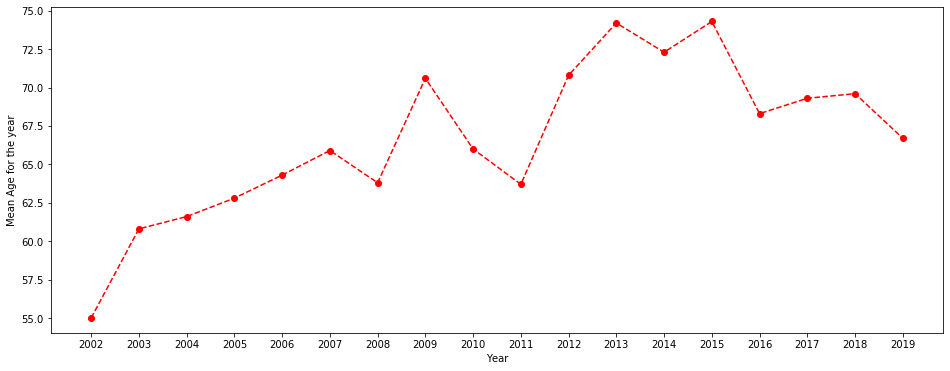

In [126]:
plt.figure(figsize=(16,6))
y=data.groupby('year').mean()['age']
xi = list(range(2002,2020))
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Square') 
plt.xticks(xi,xi)
plt.xlabel('Year')
plt.ylabel('Mean Age for the year');

**Let's see how the mean net_worth has varied over the years**

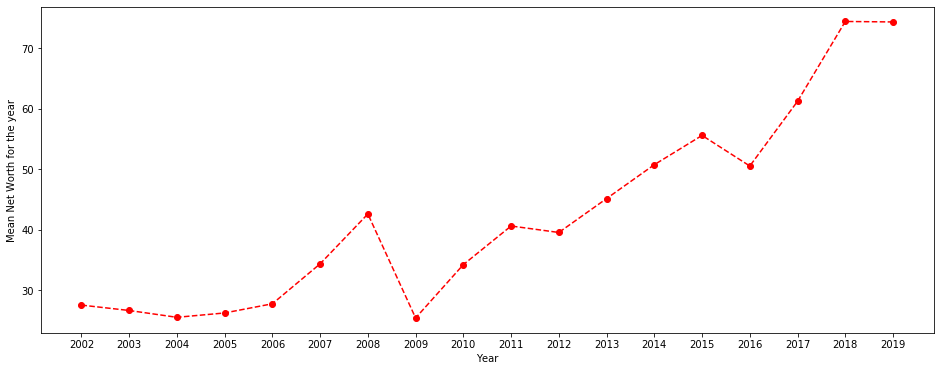

In [127]:
plt.figure(figsize=(16,6))
y=data.groupby('year').mean()['net_worth']
xi = list(range(2002,2020))
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Square') 
plt.xticks(xi,xi)
plt.xlabel('Year')
plt.ylabel('Mean Net Worth for the year');

**Let's see the details of some of these billionaires and how their net worth has changed over the years**

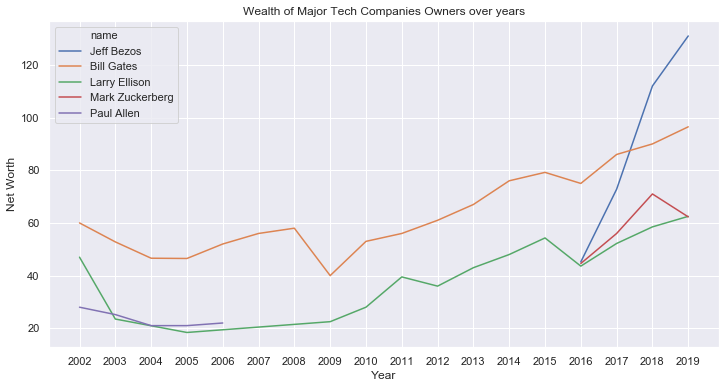

In [137]:
filter = ['Bill Gates','Jeff Bezos','Mark Zuckerberg','Paul Allen','Larry Ellison']
comparison = data[data['name'].isin(filter)][['name','year','net_worth']]
sns.lineplot(data=comparison,x='year',y='net_worth',hue='name')
plt.xticks(xi,xi)
plt.xlabel('Year')
plt.ylabel('Net Worth')
plt.title('Wealth of Major Tech Companies Owners over years')
plt.show();

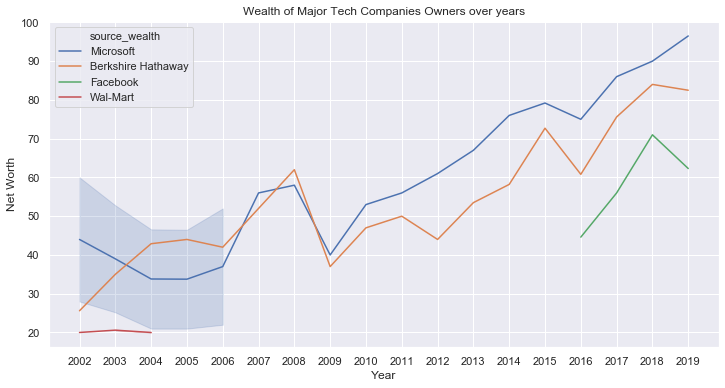

In [138]:
filter = ['Microsoft','Facebook', 'Berkshire Hathaway', 'Wal-Mart']
comparison = data[data['source_wealth'].isin(filter)][['source_wealth','year','net_worth']]
sns.lineplot(data=comparison,x='year',y='net_worth',hue='source_wealth')
plt.xticks(xi,xi)
plt.xlabel('Year')
plt.ylabel('Net Worth')
plt.title('Wealth of Major Tech Companies Owners over years')
plt.show();

---

**Let's see the summary of statistics**

In [15]:
data.describe()

,rank,net_worth,age
count,180.000000,180.000000,180.000000
mean,5.394444,42.358889,66.666667
std,2.793642,20.716910,13.689698
min,1.000000,16.100000,31.000000
25%,3.000000,25.000000,55.000000
50%,5.500000,39.800000,69.000000
75%,8.000000,56.000000,78.000000
max,10.000000,131.000000,92.000000


For net_worth, 50%ile aka Q2 is 39.8 that is nothing but the median meaning thereby that 50 percent of the values are below that and 50% above. Similarly, 25%, aka Q1, i.e. the first quartile, has 25% of the values below it and 75% above it.
75%, i.e. Q3, aka. the third quartile, has 75% of the values below it and 25% below it.

---

## Measures of Spread
Also known as measures of variability. There are four commonly used Measures of Spread viz. **Range, Variance, Standard Deviation, Interquartile Range

**RANGE**: The difference between the largest and smallest number

In [16]:
data_by_year['net_worth'].max()-data_by_year['net_worth'].min()

year
2002    43.9
2003    32.3
2004    26.6
2005    28.2
2006    33.2
2007    34.0
2008    35.0
2009    21.7
2010    30.0
2011    47.5
2012    43.6
2013    44.0
2014    41.3
2015    39.1
2016    35.4
2017    38.5
2018    53.5
2019    80.2
Name: net_worth, dtype: float64

---

**VARIANCE**: The difference mean of squared difference between each data point and the mean. 

In [17]:
data_by_year['net_worth'].var()

year
2002    208.359556
2003    105.409000
2004    104.635556
2005    106.910667
2006    121.447111
2007    169.113889
2008    185.822222
2009     71.227667
2010    142.372889
2011    235.665444
2012    226.504889
2013    267.447222
2014    241.827111
2015    263.728889
2016    159.689333
2017    192.487222
2018    278.527111
2019    578.597333
Name: net_worth, dtype: float64

---

**STANDARD DEVIATION**: The square root of the variance.

In [18]:
data_by_year['net_worth'].std()

year
2002    14.434665
2003    10.266889
2004    10.229152
2005    10.339761
2006    11.020304
2007    13.004380
2008    13.631662
2009     8.439648
2010    11.932011
2011    15.351399
2012    15.050079
2013    16.353814
2014    15.550791
2015    16.239732
2016    12.636824
2017    13.873976
2018    16.689132
2019    24.054050
Name: net_worth, dtype: float64

---

**INTERQUARTILE RANGE**: The measure of statistical dispersion between upper (75th) and lower (25th) quartiles.

In [19]:
Q1 = data_by_year['net_worth'].quantile(0.25)
Q3 = data_by_year['net_worth'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year
2002     7.850
2003     5.850
2004     2.625
2005     5.575
2006     9.125
2007    20.500
2008    24.500
2009    12.525
2010    15.375
2011    17.500
2012    16.250
2013    24.375
2014    24.050
2015    28.650
2016    17.200
2017    23.150
2018    19.225
2019    18.525
Name: net_worth, dtype: float64


## Finding outliers in a column using Standard Deviation
Standard deviation is helpful because it describes how far away from the mean your data generally is. We can use this to find data points that are usually far from the mean. These are called as **outliers**.

Let's try to find out the outliers for the age column. Meaning thereby we are finding people who are too old or too young as compared to the entire dataset of billionaires. 

In [20]:
data['age_std'] = ((data['age'] - data['age'].mean())/ data['age'].std())
data.sort_values(by='age_std').head(10)

,year,rank,name,net_worth,age,nationality,source_wealth,age_std
35,2016,6,Mark Zuckerberg,44.6,31,United States,Facebook,-2.605366
24,2017,5,Mark Zuckerberg,56.0,32,United States,Facebook,-2.532318
14,2018,5,Mark Zuckerberg,71.0,33,United States,Facebook,-2.459270
7,2019,8,Mark Zuckerberg,62.3,34,United States,Facebook,-2.386223
178,2002,9,Michael Dell,19.1,35,United States,Dell,-2.313175
118,2008,9,Oleg Deripaska,28.0,40,Russia,Rusal,-1.947937
177,2002,8,Masayoshi Son,19.4,43,Japan,"Softbank Capital, SoftBank Mobile",-1.728794
175,2002,6,Al-Waleed bin Talal,20.0,43,Saudi Arabia,Kingdom Holding Company,-1.728794
170,2002,1,Bill Gates,60.0,44,United States,Microsoft,-1.655746
9,2019,10,Larry Page,50.8,45,United States,Alphabet Inc.,-1.582699


As a thumbrule, values that are more than 3 standard deviations away from the mean are considered as outliers. So there are no outliers in this case.

In [21]:
data['networth_std'] = ((data['net_worth'] - data['net_worth'].mean())/ data['net_worth'].std())
data.sort_values(by='networth_std', ascending=False).head(10)

,year,rank,name,net_worth,age,nationality,source_wealth,age_std,networth_std
0,2019,1,Jeff Bezos,131.0,55,United States,Amazon,-0.852222,4.278684
10,2018,1,Jeff Bezos,112.0,54,United States,Amazon,-0.925270,3.361559
1,2019,2,Bill Gates,96.5,63,United States,Microsoft,-0.267841,2.613378
11,2018,2,Bill Gates,90.0,62,United States,Microsoft,-0.340889,2.299624
20,2017,1,Bill Gates,86.0,61,United States,Microsoft,-0.413937,2.106545
12,2018,3,Warren Buffett,84.0,87,United States,Berkshire Hathaway,1.485302,2.010006
2,2019,3,Warren Buffett,82.5,88,United States,Berkshire Hathaway,1.558349,1.937601
40,2015,1,Bill Gates,79.2,59,United States,Microsoft,-0.560032,1.778311
41,2015,2,Carlos Slim,77.1,75,Mexico,"América Móvil, Telmex, Grupo Carso",0.608730,1.676945
3,2019,4,Bernard Arnault,76.0,70,France,LVMH,0.243492,1.623848


So the top person here can be considered as outlier as far as net worth is considered meaning thereby Jeff Bezos in the year 2018 and 2019 was <i> super rich </i>, i.e. way more rich even as compared to the rich. 

## Plots 

It is easier to understand outliers using boxplots.

In [28]:
data1=data[data['year']==2019]

In [35]:
px.box(data1,y='age',height=500,width=600)

In [36]:
px.box(data1,y='net_worth',height=500,width=600)

Apart from a boxplot, a simple histogram can also give the same insight.

## Measures of Shape

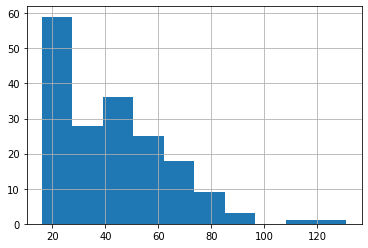

In [24]:
data['net_worth'].hist()

This is **right skewed data**, meaning thereby the mean is higher than the median because some net worth values are actually pretty high as can be cross validated from the data below.

In [25]:
data['net_worth'].describe()

count    180.000000
mean      42.358889
std       20.716910
min       16.100000
25%       25.000000
50%       39.800000
75%       56.000000
max      131.000000
Name: net_worth, dtype: float64

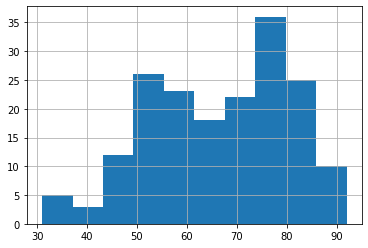

In [26]:
data['age'].hist()

Most of the rich billionaires are aged between 70 to 80. However, this is a slightly **left skewed data**, meaning thereby some of the rich people are actually too young as compared to the rest.